## Classification with Neural Networks

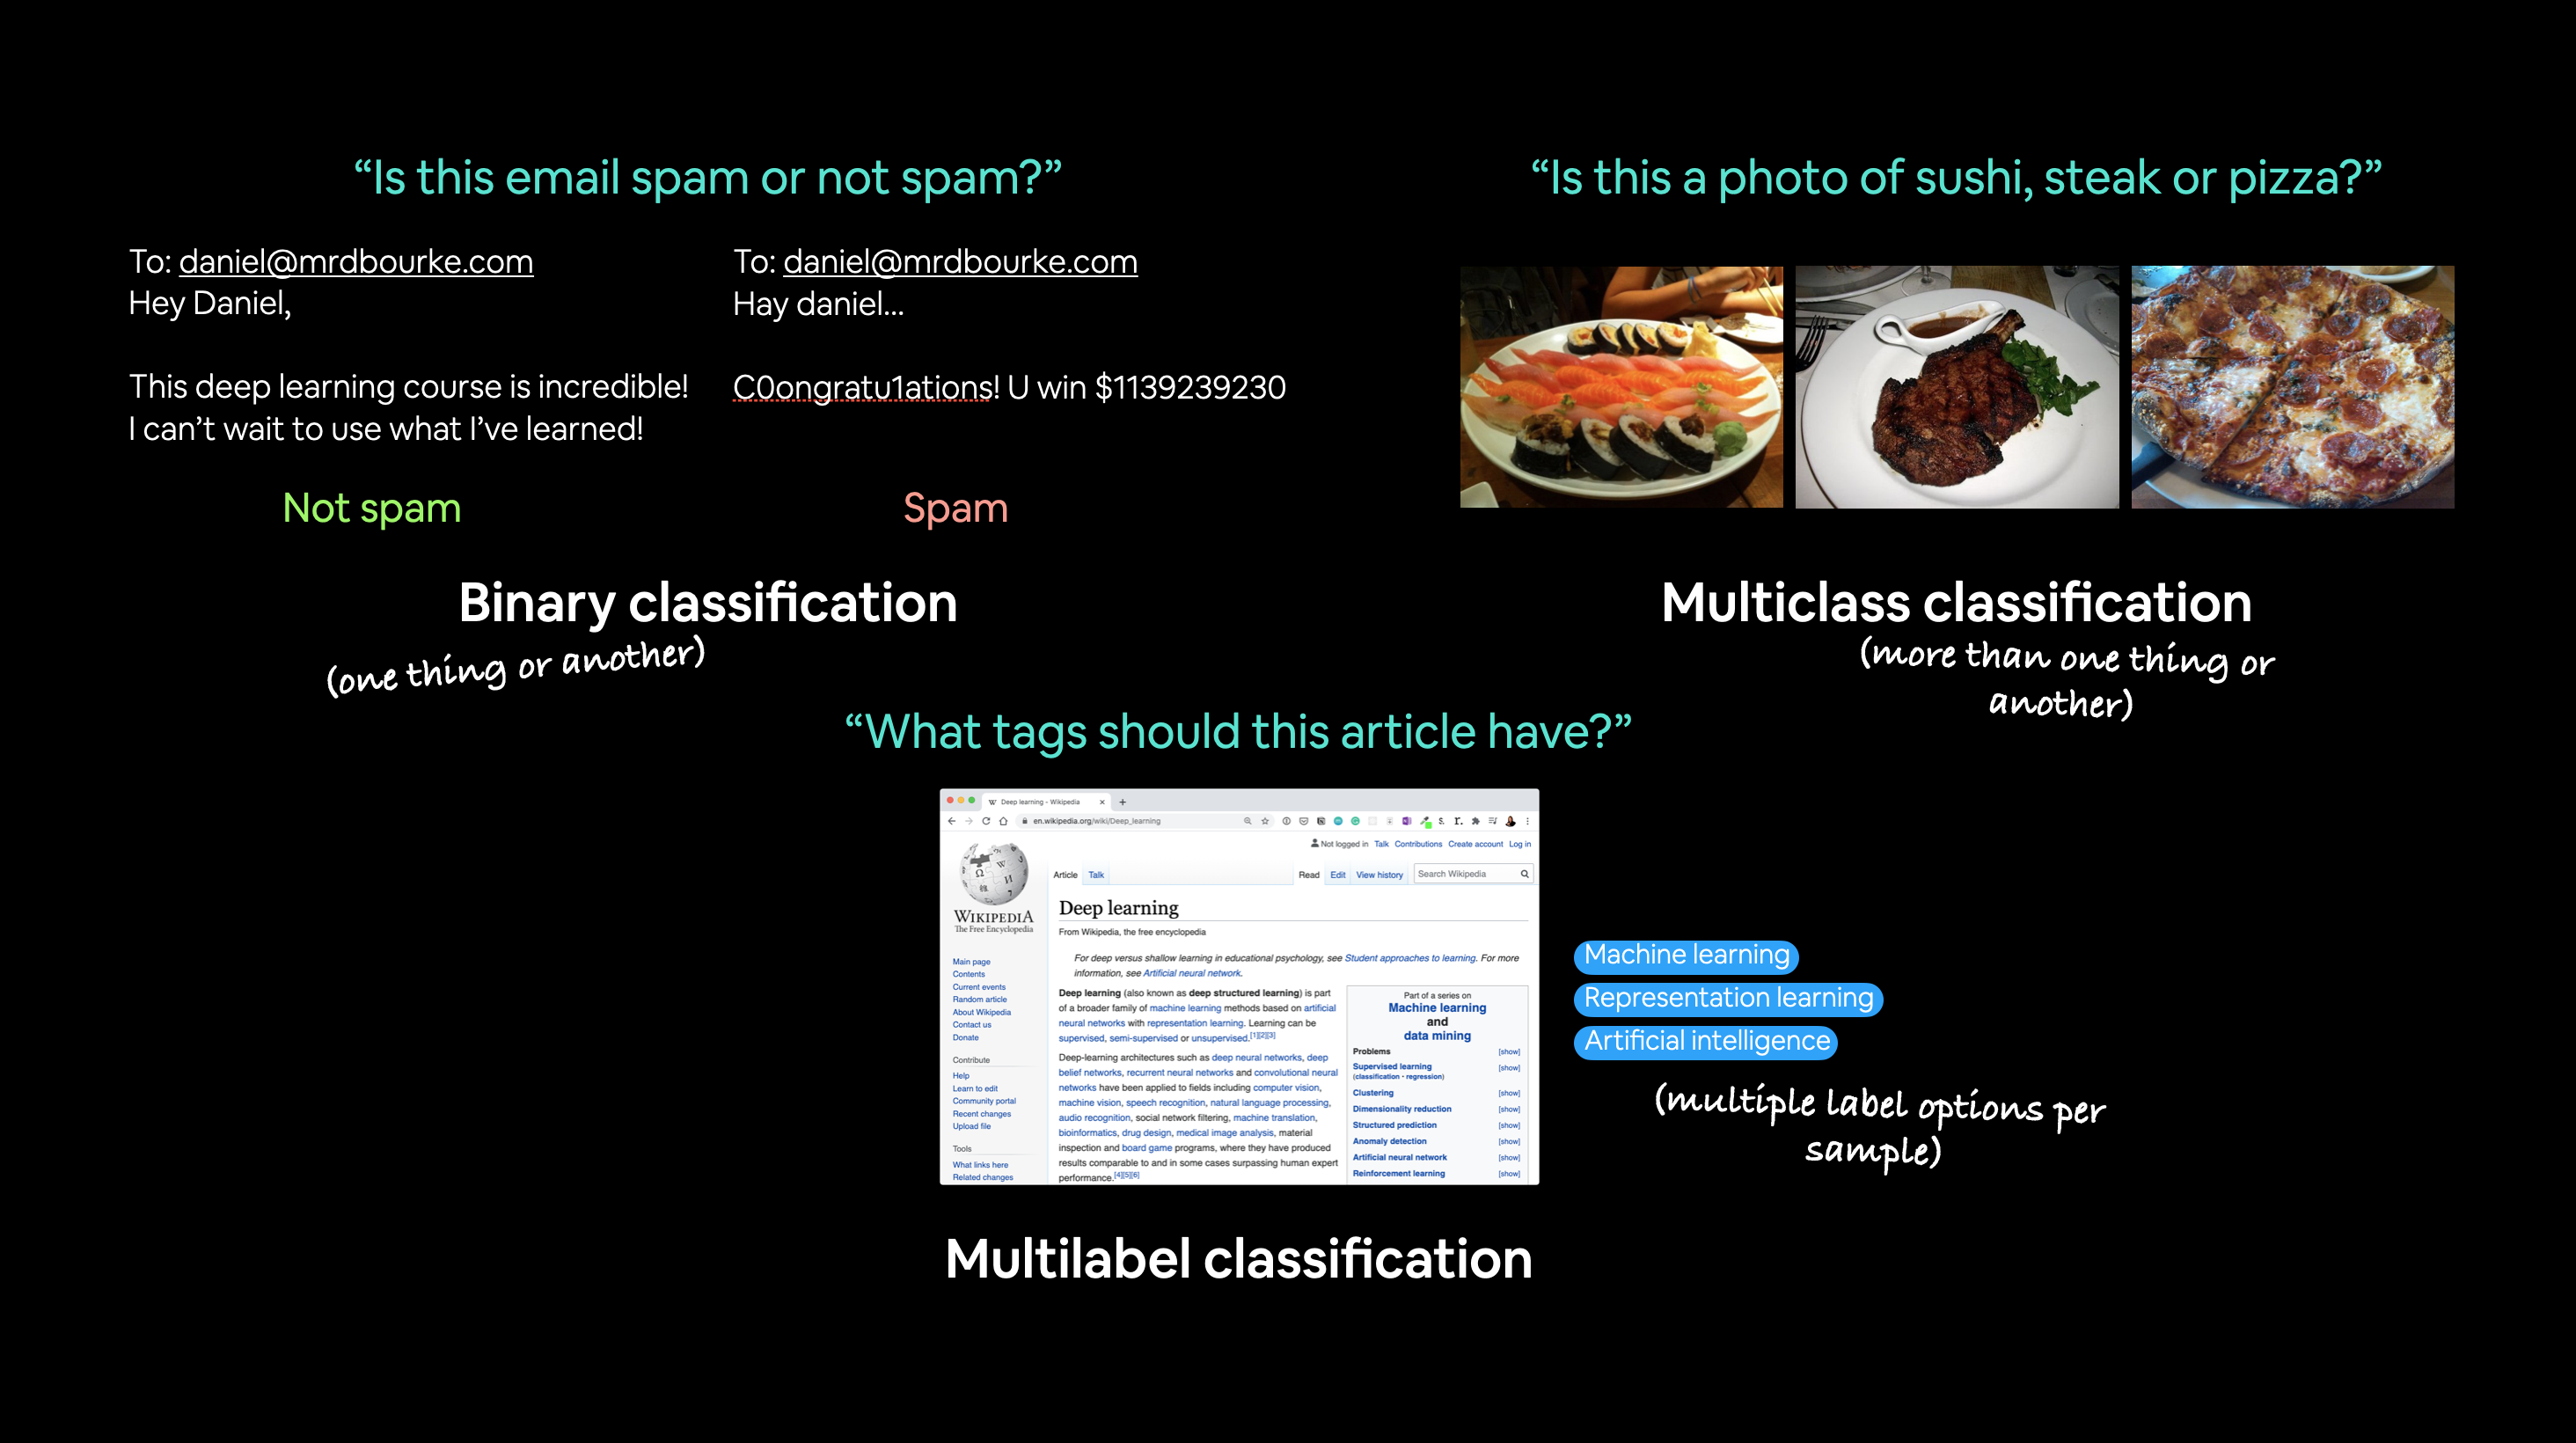

## Architecture of a Classification Neural Network

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter**            | **Binary Classification**                                                                                                                                               | **Multiclass Classification**                                                                                                                                                                      |
|--------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Input layer shape** (`in_features`) | Same as number of features (e.g., 5 for age, sex, height, weight, smoking status in heart disease prediction)                                                          | Same as binary classification                                                                                                                                                                    |
| **Hidden layer(s)**            | Problem specific, minimum = 1, maximum = unlimited                                                                                                                     | Same as binary classification                                                                                                                                                                    |
| **Neurons per hidden layer**   | Problem specific, generally 10 to 512                                                                                                                                  | Same as binary classification                                                                                                                                                                    |
| **Output layer shape** (`out_features`) | 1 (one class or the other)                                                                                                                                          | 1 per class (e.g., 3 for food, person, or dog photo)                                                                                                                                              |
| **Hidden layer activation**    | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification                                                                                                                                                                    |
| **Output activation**          | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)                      | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch)                                         |
| **Loss function**              | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch)                                                              |
| **Optimizer**                  | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) ([`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification                                                                                                                                                                    |

Of course, this ingredient list of classification neural network components will vary depending on the problem you're working on.


<b> Making a Toy Classification Dataset </b>

In [1]:
import torch
from torch import nn

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X , y = make_circles(n_samples , noise=0.03 , random_state=42)

In [3]:
len(X) , len(y)

(1000, 1000)

In [4]:
X[:5] , y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [5]:
type(X) , X.shape , type(y) , y.shape

(numpy.ndarray, (1000, 2), numpy.ndarray, (1000,))

In [6]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

In [7]:
type(X) , X.dtype , type(y) , y.shape

(torch.Tensor, torch.float32, torch.Tensor, torch.Size([1000]))

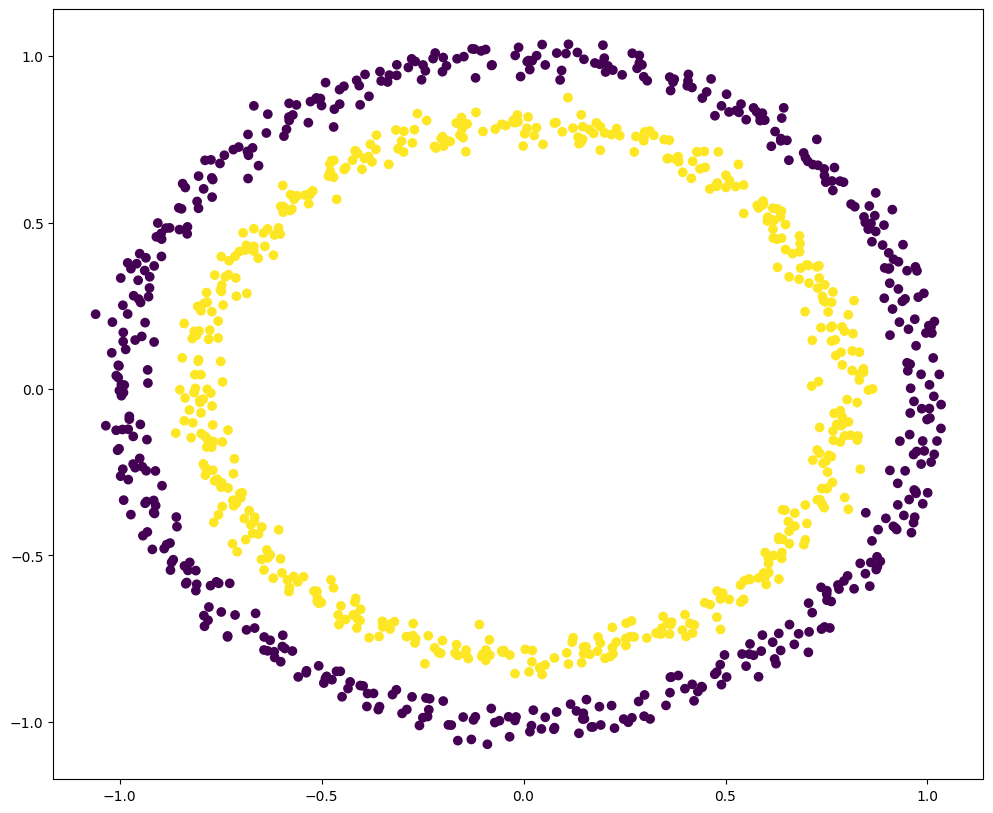

In [8]:
# import seaborn as sns

# sns.scatterplot(data=data , x='X1' , y='X2' , hue='label')

import matplotlib.pyplot as plt
plt.figure(figsize=(12 , 10))
plt.scatter(x=X[: , 0] , y=X[: , 1] , c=y)

Data we are working with is a toy dataset which is good for practicing fundamentals...

<b> Training Split </b>

In [9]:
train_split = int(0.8 * len(X))

In [10]:
train_split

800

In [11]:
X_train , y_train = X[:train_split] , y[:train_split]
X_test ,  y_test = X[train_split:] , y[train_split:]

In [12]:
X_train.shape , y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

<b> Constructing Classification Model using nn.Module </b> 

1. Subclassing `nn.Module` and Overriding `forward()`
2. Creating 2 * `nn.Linear()` computation layers that handle shape of our data.

In [13]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()

        # hidden layer which upscales it to 16 features. More the features ( under a threshold ) more the model has the chance to learn from data 
        self.layer1 = nn.Linear(in_features=2 , out_features=16) 

        # treating layer2 as output layer
        self.layer2 = nn.Linear(in_features=16 , out_features=1)
        
         # The successor layer must match the outfeatures of predecessor's layer
        

    def forward(self , X):
        return self.layer2(self.layer1(X))

<b><i> forward method's chain : </i></b>


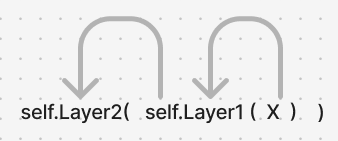

In [ ]:
Model = CircleModel()

In [19]:
with torch.inference_mode():
    pred = Model(X_test)
pred[:5]

tensor([[-0.3790],
        [-0.2925],
        [-0.3727],
        [-0.1249],
        [-0.3936]])

<b> Replicating the same Model with `nn.Sequential()`

In [16]:
Model = nn.Sequential(
    nn.Linear(in_features=2 , out_features=16),
    nn.Linear(in_features=16 , out_features=1) 
)

In [17]:
Model

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): Linear(in_features=16, out_features=1, bias=True)
)

<b> the Class `CircleModel()` can be reimplemented as </b>

In [21]:
"""
    The same Class but with `nn.Sequential` the implementation of layers of our network becomes 
    simple since it does the manual work behind the scenes
"""
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layers = nn.Sequential(
        nn.Linear(in_features=2 , out_features=16),
        nn.Linear(in_features=16 , out_features=1)
       )
        

    def forward(self , X):
        return self.linear_layers(X)

In [22]:
Model = CircleModel()

Model

CircleModel(
  (linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [23]:
Model.state_dict() # viewing weights and biases of each layer (16*2) neurons

OrderedDict([('linear_layers.0.weight',
              tensor([[-0.3896, -0.4941],
                      [-0.2953, -0.1480],
                      [-0.5017, -0.6853],
                      [-0.5105,  0.6498],
                      [-0.5611, -0.4679],
                      [-0.1297, -0.5530],
                      [ 0.2925, -0.5697],
                      [-0.3913,  0.2483],
                      [ 0.5105, -0.1235],
                      [-0.0327, -0.3801],
                      [-0.5680,  0.5683],
                      [ 0.0480,  0.0543],
                      [ 0.1243,  0.4244],
                      [ 0.3413,  0.4051],
                      [-0.4457, -0.5898],
                      [-0.6429, -0.3782]])),
             ('linear_layers.0.bias',
              tensor([ 0.2865, -0.6918,  0.0514,  0.0029,  0.5106, -0.1816, -0.2890, -0.6096,
                       0.6832,  0.4481, -0.6821, -0.6056,  0.6177,  0.2599,  0.3017,  0.4786])),
             ('linear_layers.1.weight',
              te

In [30]:
with torch.inference_mode():
    untrained_preds = torch.round(Model(X_test))

untrained_preds[:5] , untrained_preds.shape    

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]),
 torch.Size([200, 1]))

In [31]:
X_test[:5] , y_test[:5]

(tensor([[ 0.6197,  0.5066],
         [ 0.6471, -0.3642],
         [ 0.4187,  0.6843],
         [-0.6563, -0.4358],
         [ 0.4739,  0.8212]]),
 tensor([1., 1., 1., 1., 0.]))

In [32]:
y_test[:5] , untrained_preds[:5]

(tensor([1., 1., 1., 1., 0.]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]))

<b> Setting up a Loss function and Optimizer

- Depends on the Problem : 
        For Classification `Binary Cross Entropy` or `Categorical Cross Entropy`.
        Can Use Stochastic Gradient Descent or Adam , which are common Loss Functions.
        

In [33]:
# loss_fn = nn.BCELoss() # requires the inputs to go through sigmoid activation function

loss_fn = nn.BCEWithLogitsLoss() # BCE with built-in Sigmoid activation function. Numerically stable than `BCELoss()`

Optimizer = torch.optim.SGD(params=Model.parameters() , lr=0.1)

<b> Accuracy Function as Evaluation Metric for Classification </b>

In [40]:
def accuracy_fn(y_true , y_pred):
    correct_preds = torch.equal(y_true , y_pred).sum().item()
    return (correct_preds / len(y_pred)) * 100 # accuracy(%)

<b> From *Raw Logits* to *Prediction Probabilites* and Finally *Prediction Labels*... </b>

Our Initial model outputs **logits** *[ Logits are the outputs of a neural network before the activation function is applied  scores represent the model’s confidence in predicting each class. ]*

Thus we need to pass them to an Activation Function
    - E.g **Sigmoid** for Binary Cross Entropy And **Softmax** for Multiclass Classification. 

After that for Label according to Act. Function Sigmoid for `.round()` And Softmax for `.argmax()`

In [41]:
with torch.inference_mode():
    logit_preds = Model(X_test)
logit_preds[:5]

tensor([[0.2483],
        [0.2965],
        [0.2222],
        [0.1917],
        [0.2196]])

In [44]:
y_pred_probs = torch.sigmoid(logit_preds)
y_pred_probs[:5]

tensor([[0.5618],
        [0.5736],
        [0.5553],
        [0.5478],
        [0.5547]])

In [47]:
y_pred = torch.round(y_pred_probs)
y_pred[:5]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

Generally `label_1(0) < 0.5 < label 2 (1)` for Binary classification...